In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import mutual_info_score

In [60]:
from scipy.spatial.distance import pdist, squareform
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    C = [1,1]

    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])

    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)

    I.extend(J)
    C.extend(i)

    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I


def entropy(probs):
    
    return -probs.dot(np.log2(probs))


def mutual_info(df):
    
    Hx = entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = df.groupby(list(df.columns.values)).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    return {'H_'+list(df)[0]:Hx,'H_'+list(df)[1]:Hy,'MI':MI,'NMI':NMI} 


from scipy.spatial.distance import pdist, squareform
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    C = [1,1]

    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])

    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)

    I.extend(J)
    C.extend(i)

    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I


def entropy(probs):
    numOfElement = probs.shape[0]
    newIndex = list(range(numOfElement))
    probs.index  = newIndex
    for i in range(numOfElement):
        if(probs[i]==0.0):
            probs = probs.drop(i)
    return -probs.dot(np.log2(probs))


def mutual_info(df):
    Hx = entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = df.groupby(list(df.columns.values)).size()
    #print(counts)
    probs = counts/ counts.values.sum()
    #print(probs)
    H_xy = entropy(probs)
    #print(H_xy)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    return {'H_'+list(df)[0]:Hx,'H_'+list(df)[1]:Hy,'MI':MI,'NMI':NMI} 


In [61]:
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [62]:
##Question 1  Feature Standardisation

###1a
#pick all the continuous features from food and store in a new dataframe food_with_con
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']


###1b
#normalise the data to have 0 mean and unit variance using the library functions. 
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)

#change the matrix into the dataframe form 
foodscaled = pd.DataFrame(foodscaled)


###1c
#find the number of rows and columns of the foodscaled
nRows = foodscaled.shape[0]
nCols = foodscaled.shape[1]

#find the minimum and maximum number in the foodscaled 
minValue = round(foodscaled.min().min(), 1)
maxValue = round(foodscaled.max().max(), 1)

#find the mean and standard deviation of the foodscaled 
meanValue = round(foodscaled.mean().mean(), 1)
stdValue = round(foodscaled.values.std(), 1)

#print all the result out 
print("***")
print("Q1.c:foodscaled matrix details")
print("Number of rows: "+str(nRows))
print("Number of columns: "+str(nCols))
print("Min: "+str(minValue))
print("Max: "+str(maxValue))
print("Mean: "+str(meanValue))
print("Standard Deviation "+str(stdValue))
print("***")

***
Q1.c:foodscaled matrix details
Number of rows: 5740
Number of columns: 53
Min: -2.0
Max: 75.8
Mean: -0.0
Standard Deviation 1.0
***


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


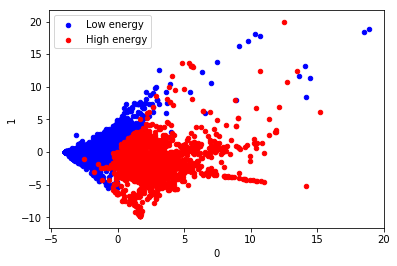

In [63]:
#Question 2 Principal Components Analysis
#reset the foodscaled at the beginning of the question
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)
foodscaled = pd.DataFrame(foodscaled)

###2a
#create the feature EnergyLevel which has value '1' if unstandardized Energy, with dietary fibre (kJ)is greater than 1000kj and '0' otherwise 
EnergyLevel= food['Energy, with dietary fibre (kJ)'].apply(lambda x: '1' if x > 1000 else '0')

###2b
#apply principal components analysis to foodscaled and set the number oc components equals to 2
pca=PCA(n_components=2)
#store the result in the foodreduced 
foodreduced=pca.fit_transform(foodscaled)
#transform the foodreduced into the dataframe form 
foodreduced= pd.DataFrame(foodreduced)

###2c
#add the feature EnergyLevel in the foodreduced to draw the scatter plot
foodreduced["EnergyLevel"] = EnergyLevel

#seperate that value into different color according to the energylevel
blueElement = foodreduced[foodreduced["EnergyLevel"]=='0']
redElement = foodreduced[foodreduced["EnergyLevel"]=='1']

#plot low energylevel scatter plot first and add another data at the same plot
ax = blueElement.plot.scatter(x=0,y=1, c='b', label='Low energy')
redElement.plot.scatter(x=0,y=1,c='r', label = 'High energy', ax=ax)


Question 2d 

1) The scatter plot is a projection that captures the largest amount of nutrition variance of different food, (we also seperate different level energy food by different color). 

2) The nutrition variance of low_energy food is less than high_energy one. and there is a significant differece in the nutrient variance between low_energy food and high_energy food 

3) Advantage: The original food dataset has 53 features, it is hard to visualize. The PCA can make the dataset into a 2-dimensional dataset to give a clear sense of variance. 
Disadvantage: On the process of dimension reduction, Some data will inevitably be lost. We cannot know which attribute casuse the biggest difference in food.


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


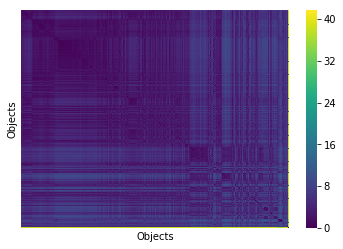

In [64]:
#Question 3
#reset the foodscaled at the beginning of the question
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)
foodscaled = pd.DataFrame(foodscaled)


###3a
# Convert the datatype of the Survey ID attribute into the string type
food['Survey ID'] = food['Survey ID'].astype('str')

#create the new attribute according to the survey ID
foodCate = food['Survey ID'].str.slice(0, 2)


###3b
#insert the attribute into foodscaled
foodscaled["Food category"] = foodCate

#find the the food with Food Category equals 13, 20, 24. and combine them into a new dataframe called foodscaledsample
foodscaledsample = foodscaled.loc[foodscaled["Food category"].isin(["13", "20", "24"])]
#delete column "Food category" avoid it affecting the data
del foodscaledsample["Food category"]
foodscaledsample


###3c

#Apply VAT Algorithm to foodscaledsample dataset and visualise using heatmap
RV, C, I = VAT(foodscaledsample)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()


Question 3e here
1) There are 2 clusters are apparent in this heatmap. 

2) This is not expected, because there are 3 food category(13, 20, 24) in the dataset. 

3) When two of the food category are very close together and some heatmap colors will make them seems like there is  only one food category.

4) One category's color is well separated from other two, and the two similar food category's colors is similar but still can tell they are different. 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


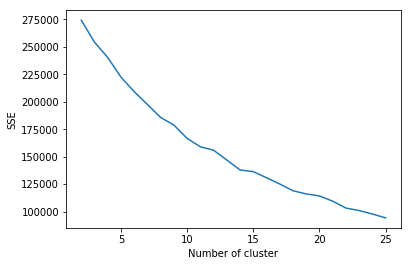

In [65]:
#Question 4
#reset the foodscaled at the beginning of the question
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)
foodscaled = pd.DataFrame(foodscaled)

#create a dictionary that will store number Of clusters and cooresponding SSE
sse = {}

#set the number of k from 2 to 25
for k in range(2, 26):
    #find the kmeans 
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(foodscaled)
    #and calculate the certain SSE
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluste
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Question 4b

The graph is a decreasing line.

The elbow is at 18. 

This shape is expected cause as the cluster increase, the distance from each point to its cluster center will be decrese. so the shape should be decreasing. And for the elbow, There are 22 food category and there are some food category are close so the elbow should exist between 15 to 22.

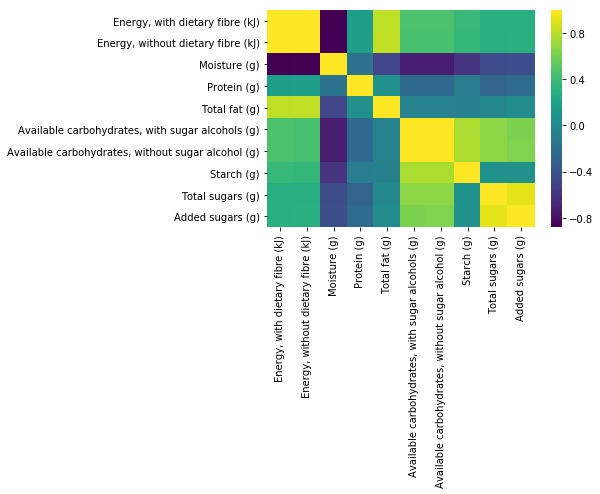

In [66]:
###Question 5

###5a
# find out the corresponding features 
food_corr = food.loc[:,'Energy, with dietary fibre (kJ)':'Added sugars (g)']
#calculate their pearson correlation
correlationDF = food_corr.corr(method='pearson')

#use heatmap to plot the matrix 
ax=sns.heatmap(correlationDF,cmap='viridis')
plt.show()

###5b code

#create the dataFrame that store 2 features  'Energy, with dietary fibre (kJ)' and 'Protein (g)'
Energy = food['Energy, with dietary fibre (kJ)']
Protein = food['Protein (g)']
DF = pd.DataFrame({'Energy':Energy, 'Protein':Protein})


MI = {}


category = list(range(2))
cuttedEnergy = pd.cut(sorted(Energy), 2, labels=category)
cuttedProtein = pd.cut(sorted(Protein), 2, labels=category)
currentDataFrame = pd.DataFrame({'Energy':cuttedEnergy, 'Protein':cuttedProtein})
result = mutual_info(currentDataFrame)
MI[2] = result["MI"]


for l in range(10, 200, 10):
    category = list(range(l))
    cuttedEnergy = pd.cut(sorted(Energy), l, labels=category)
    cuttedProtein = pd.cut(sorted(Protein), l, labels=category)
    currentDataFrame = pd.DataFrame({'Energy':cuttedEnergy, 'Protein':cuttedProtein})
    result = mutual_info(currentDataFrame)
    MI[l] = result["MI"]
    
#plot the MI out
plt.figure()
plt.plot(list(MI.keys()), list(MI.values()))
plt.xlabel("Number of bins")
plt.ylabel("MI")
plt.show()    
    

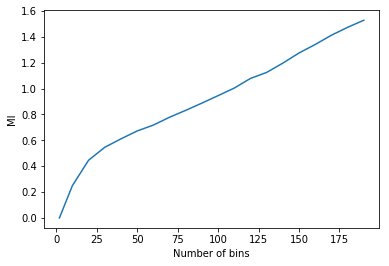

In [67]:
#5b
Energy = food['Energy, with dietary fibre (kJ)']
Protein = food['Protein (g)']

MI = {}
cuttedEnergy = pd.cut(Energy, 2, labels=False)
cuttedProtein = pd.cut(Protein, 2, labels=False)
currentDataFrame = pd.DataFrame({'Energy':cuttedEnergy, 'Protein':cuttedProtein})
result = mutual_info(currentDataFrame)
MI[2] = result.get("MI")

# #set the number of k from 2 to 25
for l in range(10, 200, 10):
    cuttedEnergy = pd.cut(Energy, l, labels=False)
    cuttedProtein = pd.cut(Protein, l, labels=False)
    currentDataFrame = pd.DataFrame({'Energy':cuttedEnergy, 'Protein':cuttedProtein})
    result = mutual_info(currentDataFrame)
    MI[l] = result.get("MI")
    
#plot the MI out
plt.figure()
plt.plot(list(MI.keys()), list(MI.values()))
plt.xlabel("Number of bins")
plt.ylabel("MI")
plt.show()    
    

##### Question 5b 

It is a increasing trend

According to the formula of MI(MI(X, Y) = H(X)-H(X|y) and H(X) = Σ-pi*log2(pi)),as the bin-width increase, then H(X) increase and H(X|y) decrease, So the MI(X, Y) Increase as the graph show.

In [68]:
###5c code

#Pearson correlation 

# take all the attributes with continuous value out 
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']

#calculate 53 pairs of Pearson correlation
correlationDF = food_with_con.corr(method='pearson')
#change all values on the diagonal to zero 
correlationDF.values[[np.arange(len(correlationDF.index))]*2] = 0
#find the top 10 feature-pairs 
sortedCorrelation = correlationDF.max().sort_values(ascending = False)



#store the feature and Pearson value in the TopPearsonCor dataframe
#feature1 is the one of the feature pair and feature 2 is another
feature1 = []
feature2 = []
# Pearson_value is the Pearson correlation Pearson value corresponding to the feature1 and feature2
Pearson_Value = []

#cause the series has already sorted, so we only need to find top 10 by the order of the series 
for index in sortedCorrelation.index:
    # when there are already 10 values, then stop the loop
    if(len(Pearson_Value)==10):
        break
        
    #when there are no value in the list or this value is not repeated value of last pair(feature1 VS feature2 and feature2 VS feature1 are repeated)
    if(len(Pearson_Value)==0 or sortedCorrelation[index]!=Pearson_Value[-1]):
        #store the features and Pearson correlation value into the list
        feature1.append(index)
        Pearson_Value.append(sortedCorrelation[index])
        corfeature = correlationDF[correlationDF[index]==sortedCorrelation[index]].index.tolist()[0]
        feature2.append(corfeature)
        
#store all these information together 
data = {"feature1":feature1, "feature2":feature2, "Pearson Value":Pearson_Value}
ToptenPearsoncor = pd.DataFrame(data)
#print the dataframe out
ToptenPearsoncor


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


feature1  \
0                             Alpha-tocopherol (mg)   
1                   Energy, with dietary fibre (kJ)   
2                                Beta-carotene (µg)   
3  Available carbohydrates, with sugar alcohols (g)   
4                                   Free sugars (g)   
5                               Total Folates  (µg)   
6                     Total polyunsaturated fat (g)   
7                                  Folic acid  (µg)   
8                Preformed vitamin A (retinol) (µg)   
9                      C22:6w3 Docosahexaenoic (mg)   

                                            feature2  Pearson Value  
0                                     Vitamin E (mg)       0.999528  
1                 Energy, without dietary fibre (kJ)       0.998608  
2         Provitamin A (b-carotene equivalents) (µg)       0.995961  
3  Available carbohydrates, without sugar alcohol...       0.995466  
4                                   Added sugars (g)       0.988894  
5                   Dietary folate equivalents  (µg)       0.985763  
6                                  Linoleic acid (g)       0.973640  
7                   Dietary folate equivalents  (µg)       0.958112  
8                 Vitamin A retinol equivalents (µg)       0.954100  
9          Total long chain omega 3 fatty acids (mg)       0.952762

In [69]:
###5c code

#Mutual Information
# take all the attributes with continuous value out 
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']

attribute1 =[]
attribute2 =[]
Mutual_information = []

for index1 in food_with_con.columns:
    for index2 in food_with_con.columns:
        if index1==index2:
            pass
        else:
            attribute1.append(index1)
            attribute2.append(index2)
            
            feature1= food_with_con[index1]
            feature2= food_with_con[index2]
            cuttedfeature1 = pd.cut(feature1, 20, labels=False)
            cuttedfeature2 = pd.cut(feature2, 20, labels=False)
            currentDataFrame = pd.DataFrame({'feature1':cuttedfeature1, 'Protein':cuttedfeature2})
            result = mutual_info(currentDataFrame)
            Mutual_information.append(result["MI"])
            
data = {"feature1":attribute1, "feature2":attribute2, "Mutual information":Mutual_information}
MIlist = pd.DataFrame(data)
sortedMI = MIlist.sort_values(by="Mutual information", ascending = False)       
toptenMI = sortedMI.iloc[0:20, :]

newIndex = list(range(0, 20))
toptenMI.index  = newIndex
for i in range(0, 20):
    if(i%2 == 1):
        toptenMI = toptenMI.drop(i)
newIndex = list(range(1, 11))
toptenMI.index  = newIndex
toptenMI

feature1  \
1                    Energy, with dietary fibre (kJ)   
2   Available carbohydrates, with sugar alcohols (g)   
3                    Energy, with dietary fibre (kJ)   
4                 Energy, without dietary fibre (kJ)   
5                                    Tryptophan (mg)   
6                                    Free sugars (g)   
7                                         Starch (g)   
8                                         Starch (g)   
9                                    Free sugars (g)   
10                   Energy, with dietary fibre (kJ)   

                                             feature2  Mutual information  
1                  Energy, without dietary fibre (kJ)            3.140250  
2   Available carbohydrates, without sugar alcohol...            3.070813  
3                                        Moisture (g)            1.880160  
4                                        Moisture (g)            1.791029  
5                                         Protein (g)            1.359985  
6                                    Added sugars (g)            1.253871  
7   Available carbohydrates, without sugar alcohol...            1.101232  
8    Available carbohydrates, with sugar alcohols (g)            1.095449  
9                                    Total sugars (g)            0.978975  
10                                      Total fat (g)            0.959014

#Mutual Information
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']

attribute1 =[]
attribute2 =[]
Mutual_information = []

for index1 in food_with_con.columns:
    for index2 in food_with_con.columns:
        if index1==index2:
            pass
        else:
            attribute1.append(index1)
            attribute2.append(index2)
            
            feature1= food_with_con[index1]
            feature2= food_with_con[index2]
            category = list(range(20))
            cuttedfeature1 = pd.cut(sorted(feature1), 20, labels=category)
            cuttedfeature2 = pd.cut(sorted(feature2), 20, labels=category)
            currentDataFrame = pd.DataFrame({'feature1':cuttedfeature1, 'Protein':cuttedfeature2})
            result = mutual_info(currentDataFrame)
            Mutual_information.append(result["MI"])
            
data = {"feature1":attribute1, "feature2":attribute2, "Mutual information":Mutual_information}
MIlist = pd.DataFrame(data)
sortedMI = MIlist.sort_values(by="Mutual information", ascending = False)       
toptenMI = sortedMI.iloc[0:20, :]

newIndex = list(range(0, 20))
toptenMI.index  = newIndex
for i in range(0, 20):
    if(i%2 == 1):
        toptenMI = toptenMI.drop(i)
newIndex = list(range(1, 11))
toptenMI.index  = newIndex
toptenMI

Question 5c 


There are some top10 feature-pairs by Pearson occur in the top 10 feature_pairs by Mutual Information.

Pearson value is for assessing linear correlation, the top 10 feature-pairs by Pearson are the top 10 feature-pairs has most strong linear correlation. 

And Mutual Information is a measure of correlation the amount of information about one attribute we gain by another.

So the linear correlation can also being measure by Mutual Information but not as accurate as Pearson.

That's why some of top10 feature-pairs by Pearson occur in the top 10 feature_pairs by Mutual Information. 

And other top 10 feature_pairs by Mutual Information(that is not in Pearson) are the ones got other 
correlation(eg.quadratic correlation) that is not defect by the Pearson

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


***
X_train matrix:  (4592, 53)
y_train labels:  (4592, 1)
X_test matrix:  (1148, 53)
y_test labels:  (1148, 1)
***


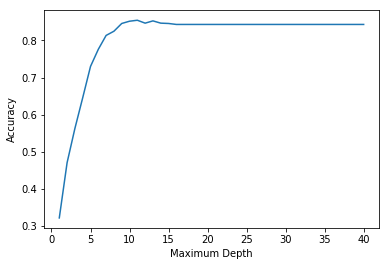

In [71]:
##Question 6
#reset the foodscaled at the beginning of the question
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)
foodscaled = pd.DataFrame(foodscaled)

#reset the food category attribute
food['Survey ID'] = food['Survey ID'].astype('str')
foodCate = food['Survey ID'].str.slice(0, 2)

###6a
#randomly select 80% of instances to be training and the rest to be testing 
X_train, X_test, y_train, y_test = train_test_split(foodscaled, foodCate,train_size=0.80, test_size=0.20, random_state=0)

#cause there is only 1 attribute in the y_train and y_test, so ther is no values on shape[1], so we add 1 manully
y_train_tuple = (y_train.shape[0], 1)
y_test_tuple = (y_test.shape[0], 1)

#print out all the result 
print("***")
print("X_train matrix: ", str(X_train.shape))
print("y_train labels: ", str(y_train_tuple))
print("X_test matrix: ", str(X_test.shape))
print("y_test labels: ", str(y_test_tuple))
print("***")


###6b
# create a dictionary to 
accuracy = {}
for k in range(1, 41):
    #train the decision tree by useing training data, and set the max_depth as k
    clf = DecisionTreeClassifier(criterion = "entropy", random_state= 1, max_depth=k)
    clf.fit(X_train, y_train)
    #calculate the accuracy score for using on the testing data
    y_pred = clf.predict(X_test)
    accuracy[k] = accuracy_score(y_test, y_pred)

#Plot the accuracy dictionary out     
plt.figure()
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()


Question 6c 
The shape of the graph shows that 

      accuracy increase rapidly as the maximum-depth increase, 0 <= maximum-depth <= 12
      
      accuracy change slightly as the maximum-depth increase, 12 < maximum-depth <= 23
      
      accuracy doesn't chang any more as the maximum-depth increase, maximum-depth > 23

max-depth is how depth that allow the tree to grow to, and at the same time the model will be more complex. It will much fitter the training data, so that the accuracy will increase. this is why graph act like this at the beginning. As max-depth continue increasing, There are not so many features affect the result, so the change of accuracy becomes small and tend to be a specific value.

In [74]:
#Question 7

#reset the foodscaled at the beginning of the question
food_with_con = food.loc[:,'Energy, with dietary fibre (kJ)':'Total trans fatty acids (mg)']
scaler = StandardScaler().fit(food_with_con)
foodscaled=scaler.transform(food_with_con)
foodscaled = pd.DataFrame(foodscaled)

#reset the food category attribute
food['Survey ID'] = food['Survey ID'].astype('str')
foodCate = food['Survey ID'].str.slice(0, 2)

###7a

#randomly select 80% of instances to be training and the rest to be testing 
X_train, X_test, y_train, y_test = train_test_split(foodscaled, foodCate, test_size=0.2)

# using the training data to predict the result by 1-neighbur-classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train) 

#calculate the accuracy for both training data and testing data 
acc1 = neigh.score(X_train, y_train) 
acc2 = neigh.score(X_test, y_test) 

#print the result out 
print("***")
print("Q7a: Food category prediction using k-NN(k=1)")
print("Train accurancy: "+str(round(acc1*100, 1))+"%")
print("Test accurancy: "+str(round(acc2*100, 1))+"%")
print("***")



##7b
#randomly select 80% of instances to be training and the rest to be testing 
X_train, X_test, y_train, y_test = train_test_split(foodscaled, foodCate, test_size=0.2, random_state=42)

# using the training data to predict the result by 3-neighbur-classifier
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train, y_train) 

#calculate the accuracy for both training data and testing data
acc1 = neigh2.score(X_train, y_train) 
acc2 = neigh2.score(X_test, y_test) 

#print the result out 
print("***")
print("Q7b: Food category prediction using k-NN(k=3)")
print("Train accurancy: "+str(round(acc1*100, 1))+"%")
print("Test accurancy: "+str(round(acc2*100, 1))+"%")
print("***")

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


***
Q7a: Food category prediction using k-NN(k=1)
Train accurancy: 100.0%
Test accurancy: 90.2%
***
***
Q7b: Food category prediction using k-NN(k=3)
Train accurancy: 93.3%
Test accurancy: 88.0%
***


Question 7c 



Question 7d 

The accurancy would be biased, since the testing data was looked at when doing feature selection process that should not have been seen. Consequenctly the model that was trained using the results from the feature selection was developed on information that should not have been seen. The accuracy will thus likely be over optimistic 


In [19]:
#Question 8 code

Question 8 discussion here